In [13]:
import numpy as np
import torch
import matplotlib.pylab as plt
import pickle

In [25]:
# Time step the SDE: dot X = -mu X + sigma xi, by Euler's method.

np.random.seed(18)

# Problem setup. 
# Set model and numerical parameters, and the initial condition.
# These are the lines the user might want to vary.
tf = 8
Nsteps = 9999
Npaths = 1
X0 = 1
sde_sigma = 1 # Variance is higher than the original example
obs_sigma = 0.5

# Generate the time grid and solution array
t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
X = np.zeros((Nsteps+1,Npaths))
root_dt = np.sqrt(dt)
  
# Time step starting from initial condition
X[0,:] = X0;

for n in range(Nsteps):
    F_of_X = 4 * X[n,:] * (1 - (X[n,:] ** 2))
    X[n+1,:] =  X[n,:] + dt * F_of_X + (sde_sigma ** 2) * root_dt * np.random.randn(Npaths)

# Observations with Gaussian noise
obs = np.random.normal(loc = X[::1998], scale = obs_sigma)
obs_time = t[::1998]

In [26]:
def prior_drift (s, x_s):
    return 4 * x_s * (1 - (x_s ** 2))

In [27]:
true_sde_pts = torch.from_numpy(t)
true_sde_trj = torch.from_numpy(X.flatten())

In [28]:
obs = torch.from_numpy(obs)
obs_time = torch.from_numpy(obs_time)

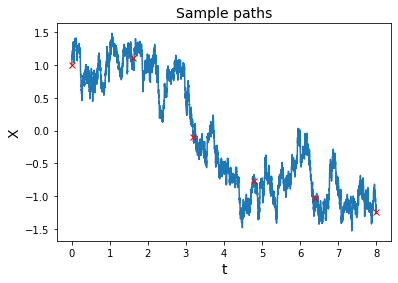

In [29]:
# Plot paths
plt.plot(t,X)
plt.plot(t[::1998], obs, "rx")
plt.xlabel("t", fontsize=14)
plt.ylabel("X", fontsize=14)
plt.title("Sample paths", fontsize=14)
plt.show()


In [30]:
prior = [true_sde_pts, true_sde_trj]
likelihood = [obs, obs_time]
std = [sde_sigma, obs_sigma]

In [31]:
with open('EX02_DW', 'wb') as f:
    pickle.dump(prior, f)
    pickle.dump(likelihood, f)
    pickle.dump(std, f)